#                                           Census Income Project

In [1]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
10730,30,Local-gov,108386,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
17333,37,Private,239397,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
3280,31,Local-gov,446358,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,Mexico,>50K
20685,42,?,32533,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,45,United-States,<=50K
6767,22,Private,180052,Some-college,10,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
30933,22,Private,147397,Bachelors,13,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,20,United-States,<=50K
26356,23,Private,245302,Some-college,10,Divorced,Sales,Own-child,Black,Female,0,0,40,United-States,<=50K
29653,50,Private,109277,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
28144,56,?,35723,HS-grad,9,Divorced,?,Own-child,White,Male,0,0,40,United-States,<=50K
19759,35,Private,204590,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,40,United-States,>50K


# DataAnalysis

In [4]:
df.shape
#Shape of the dataset..

(32560, 15)

In [5]:
df.info()
#Types of values in dataset..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.columns
#Columns in the data set...

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
df.describe()
#Finding the mean std.dev for numerical columns..

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Counting the values for each columns

In [10]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [13]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [14]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [15]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [16]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [17]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# EDA

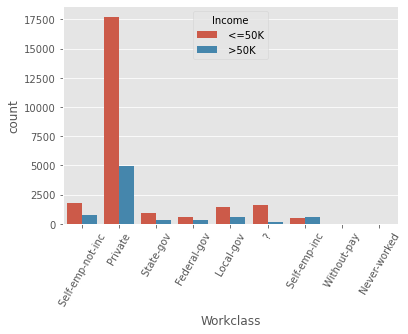

In [18]:
plt.style.use('ggplot')
sns.countplot(x = "Workclass", hue = "Income", data = df)
plt.xticks(rotation=60)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='count'>

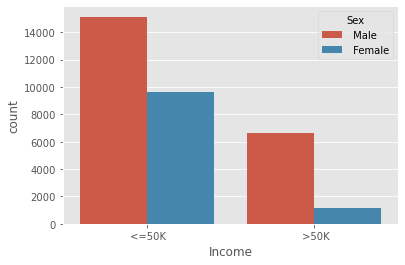

In [19]:
plt.style.use('ggplot')
sns.countplot(x = "Income", hue = "Sex", data = df)

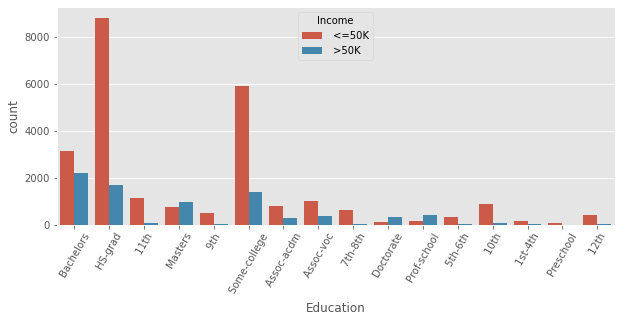

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
sns.countplot(x = "Education", hue = "Income", data = df)
plt.xticks(rotation=60)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='count'>

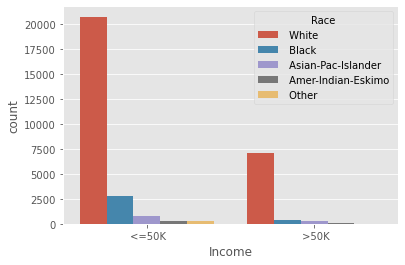

In [21]:
plt.style.use('ggplot')
sns.countplot(x = "Income", hue = "Race", data = df)

<AxesSubplot:xlabel='Income', ylabel='count'>

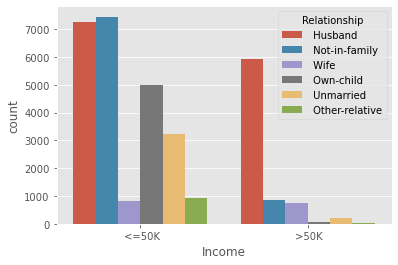

In [22]:
plt.style.use('ggplot')
sns.countplot(x = "Income", hue = "Relationship", data = df)

<AxesSubplot:xlabel='Income', ylabel='Age'>

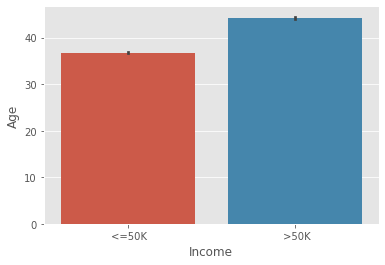

In [23]:
sns.barplot(x = "Income", y = "Age", data = df)

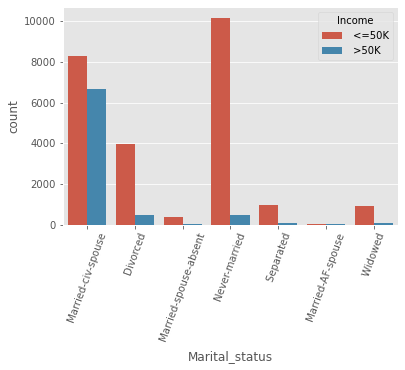

In [24]:
plt.style.use('ggplot')
sns.countplot(x = "Marital_status", hue = "Income", data = df)
plt.xticks(rotation = 70)
plt.show()

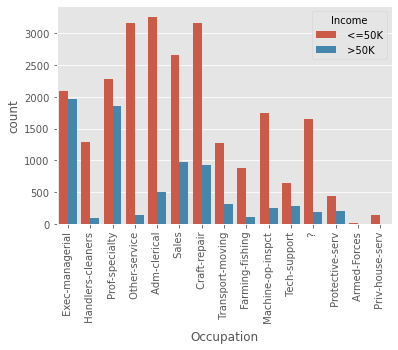

In [25]:
plt.style.use('ggplot')
sns.countplot(x = "Occupation", hue = "Income", data = df)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='count'>

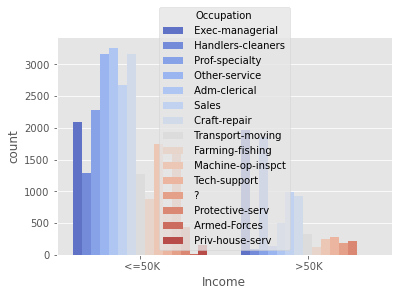

In [26]:
sns.countplot(df['Income'], palette='coolwarm', hue = 'Occupation',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

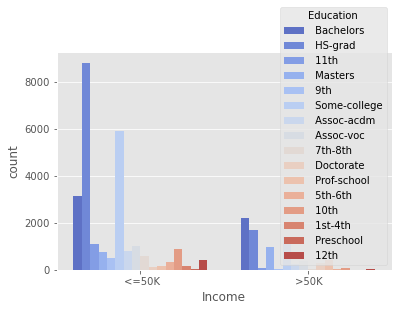

In [27]:
sns.countplot(df['Income'], palette='coolwarm', hue = 'Education',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

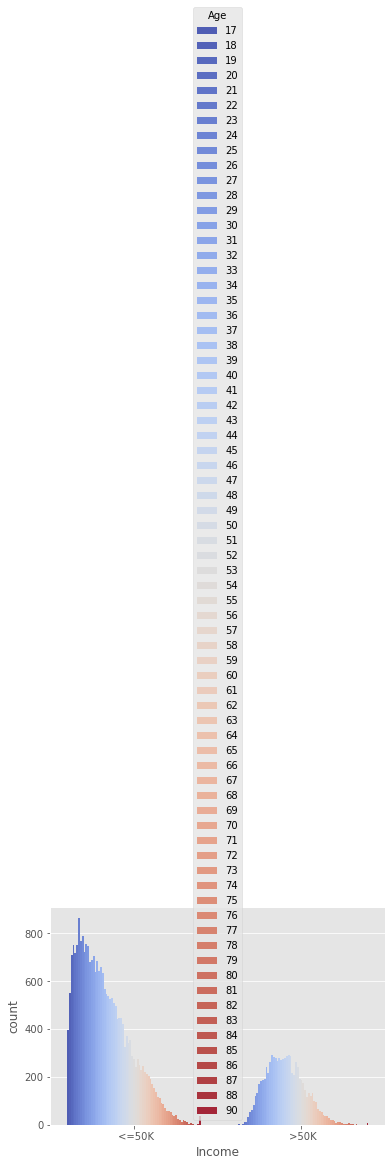

In [28]:
sns.countplot(df['Income'], palette='coolwarm', hue = 'Age',data=df)

# FILLING THE VALUES FOR ?

In [29]:
#We will replace all '?' with most frequently occuring values of that column because these are categorical columns..
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [30]:
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [31]:
df["Capital_gain"].replace(0, df["Capital_gain"].mean(),inplace = True)
#Replacing 0 in Capital_gain column with mean of this column..

In [32]:
df["Capital_loss"].value_counts()
#Most of the values are 0..

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [33]:
df.drop(columns = "Capital_loss", inplace = True)
#Dropping column Capital-loss...

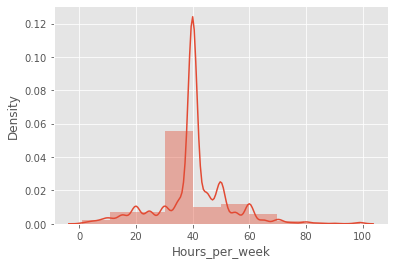

In [34]:
sns.distplot(df["Hours_per_week"], bins = 10)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

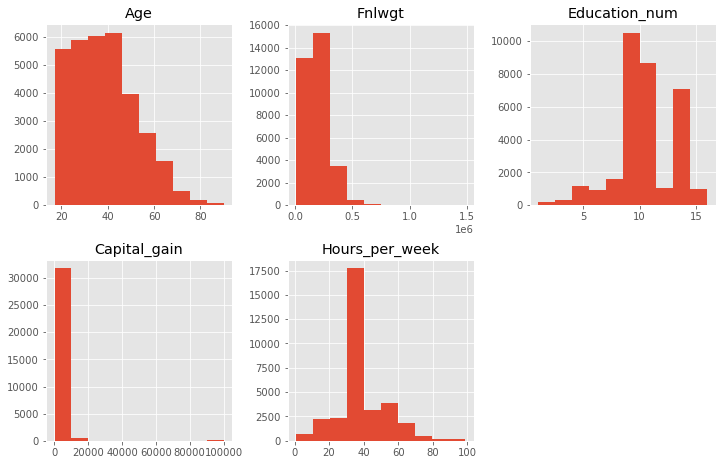

In [35]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

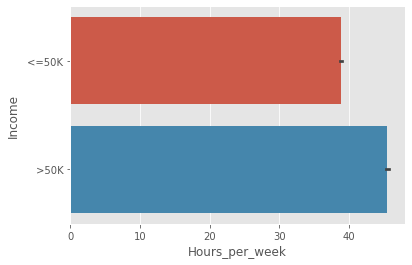

In [36]:
plt.style.use('ggplot')
sns.barplot(x = "Hours_per_week", y = "Income", data = df)

# DataPreprocessing

# Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
#Encoding the column Income to binary numbers..
lab_enc=LabelEncoder()
df["Income"]=lab_enc.fit_transform(df["Income"])

# Corelation

In [39]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.074234,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000640,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.120248,0.148127,0.335182
Capital_gain,0.074234,0.000640,0.120248,1.000000,0.076835,0.216691
Hours_per_week,0.068756,-0.018770,0.148127,0.076835,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.216691,0.229690,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

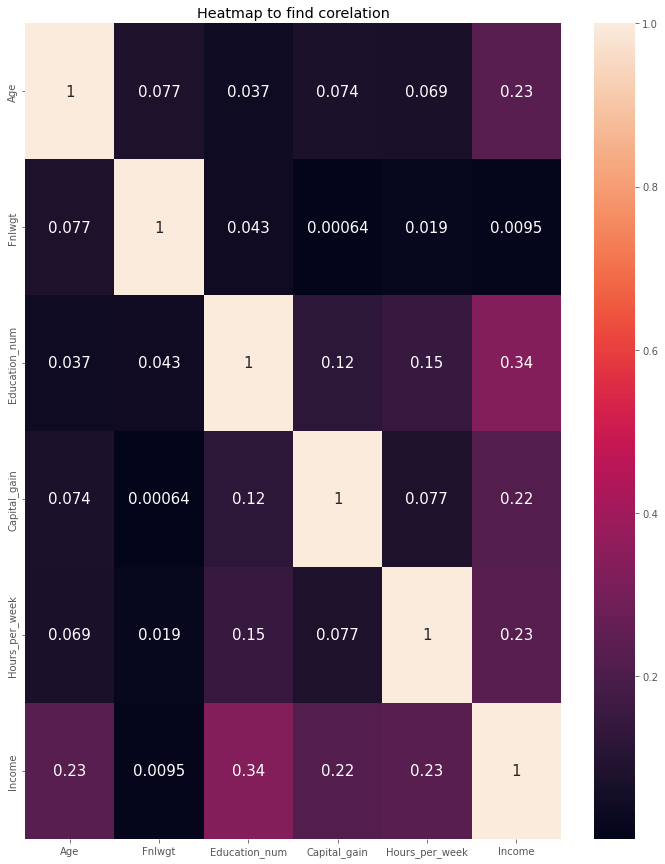

In [40]:
corr=df.corr().abs()
plt.figure(figsize=(12,15))
sns.heatmap(corr,annot=True,annot_kws={'size':15})
plt.title("Heatmap to find corelation")
plt.show

In [41]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,2065.506304,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7245.938132,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,114.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,1077.615172,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,1077.615172,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,1077.615172,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,99.000000,1.000000


# Skewness

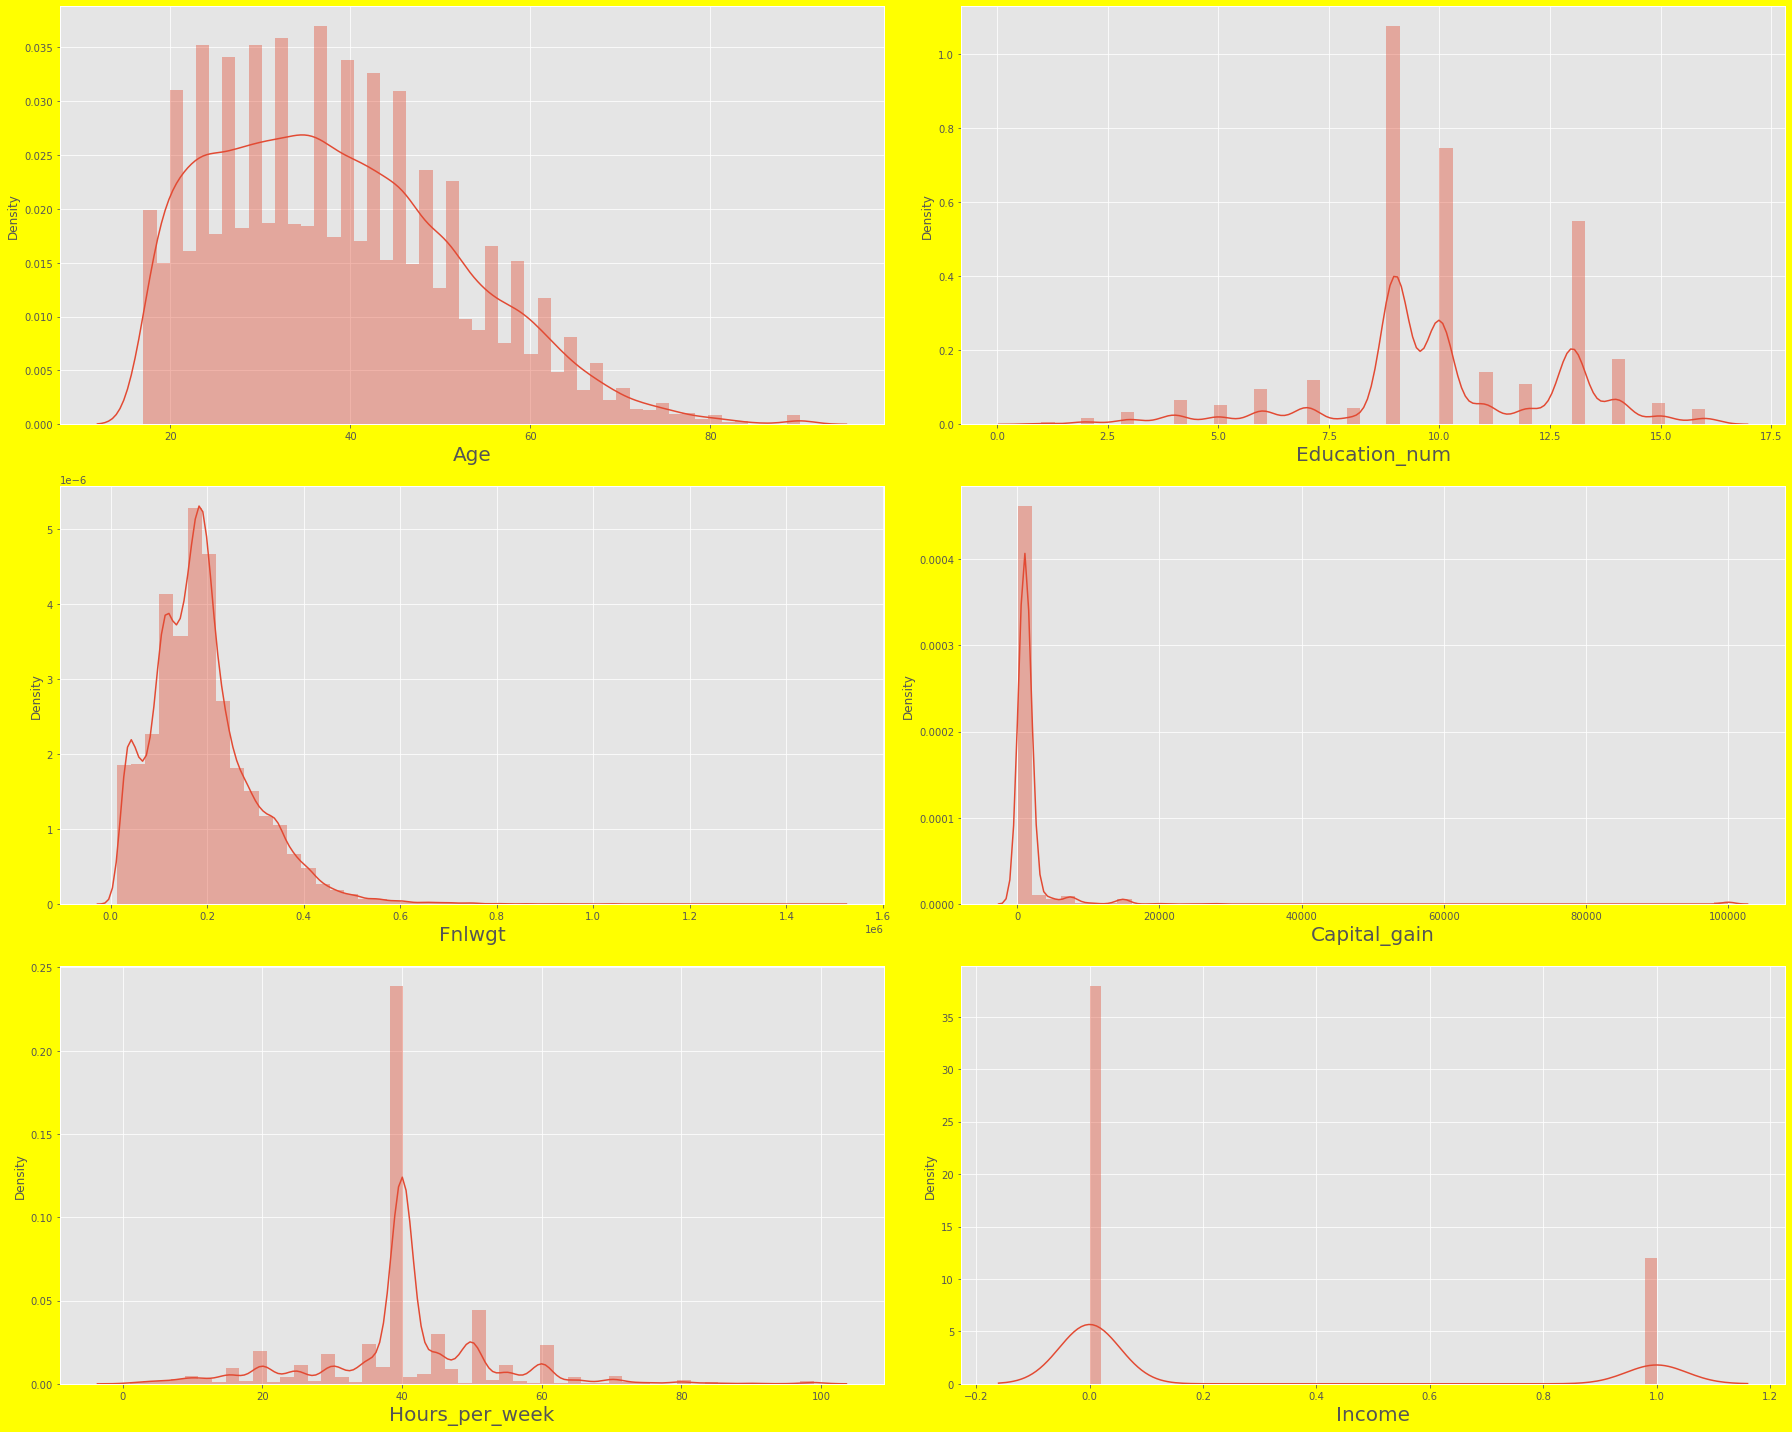

In [42]:
plt.figure(figsize = (25,20),facecolor='yellow')
plotnumber = 1
columns = ["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week","Income"]
for column in df[columns]:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [43]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      12.248734
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [44]:
#Removing Outliers by ZSCORE...
from scipy import stats
from scipy.stats import zscore

In [45]:
z_score = zscore(df[['Age','Education_num','Fnlwgt','Capital_gain','Hours_per_week']])
abs_z_score = np.abs(z_score)

In [46]:
df1 = (abs_z_score <3).all(axis=1)
df2=df[df1]
df2.reset_index(inplace=True)

In [47]:
df2

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.615172,13,United-States,0
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.615172,40,United-States,0
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.615172,40,United-States,0
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.615172,40,Cuba,0
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,1077.615172,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31250,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1077.615172,38,United-States,0
31251,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1077.615172,40,United-States,1
31252,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1077.615172,40,United-States,0
31253,32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,1077.615172,20,United-States,0


In [48]:
df.shape

(32560, 14)

In [49]:
df2.shape

(31255, 15)

In [50]:
(df.shape[0]-df2.shape[0])/df.shape[0]*100

4.007985257985258

In [51]:
df2.drop(columns = "index", inplace = True)

In [52]:
X = df2.drop(columns = "Income")
Y = df2["Income"]

In [53]:
X.skew()

Age               0.476846
Fnlwgt            0.633372
Education_num    -0.165837
Capital_gain      5.449847
Hours_per_week   -0.348974
dtype: float64

In [54]:
for index in X.skew().index:
    if X.skew().loc[index]>0.5:
        X[index]=np.cbrt(X[index])
        if X.skew().loc[index]<-0.5:
            X[index]=np.square(X[index])

In [55]:
X.skew()
#We remove most of skewness in the columns..

Age               0.476846
Fnlwgt           -0.378099
Education_num    -0.165837
Capital_gain      4.283082
Hours_per_week   -0.348974
dtype: float64

In [56]:
leb_enc = LabelEncoder()
for i in X.columns:
    if X[i].dtypes == "object":
        X[i] = leb_enc.fit_transform(X[i])

In [57]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
31250    0
31251    1
31252    0
31253    0
31254    1
Name: Income, Length: 31255, dtype: int32

In [58]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,50,5,43.675121,8,13,2,3,0,4,1,10.252298,13,38
1,38,3,59.967204,10,9,0,5,1,4,1,10.252298,40,38
2,53,3,61.685627,1,7,2,5,0,2,1,10.252298,40,38
3,28,3,69.686283,8,13,2,9,5,2,0,10.252298,40,4
4,37,3,65.776255,11,14,2,3,5,4,0,10.252298,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31250,27,3,63.603506,6,12,2,12,5,4,0,10.252298,38,38
31251,40,3,53.644440,10,9,2,6,0,4,1,10.252298,40,38
31252,58,3,53.357498,10,9,6,0,4,4,0,10.252298,40,38
31253,22,3,58.625222,10,9,4,0,3,4,1,10.252298,20,38


In [59]:
#lets seperate numerical data
num_data = pd.DataFrame(X,columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'])

In [60]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x = scaler.fit_transform(num_data)
x = pd.DataFrame(x,columns=num_data.columns)

In [61]:
x

,Age,Fnlwgt,Education_num,Capital_gain,Hours_per_week
0,0.879167,-1.102044,1.166274,-0.252441,-2.424632
1,-0.021527,0.464687,-0.454152,-0.252441,-0.003552
2,1.104341,0.629940,-1.264366,-0.252441,-0.003552
3,-0.772105,1.399324,1.166274,-0.252441,-0.003552
4,-0.096585,1.023316,1.571381,-0.252441,-0.003552
...,...,...,...,...,...
31250,-0.847163,0.814373,0.761168,-0.252441,-0.182891
31251,0.128589,-0.143343,-0.454152,-0.252441,-0.003552
31252,1.479630,-0.170936,-0.454152,-0.252441,-0.003552
31253,-1.222452,0.335635,-0.454152,-0.252441,-1.796944


In [62]:
cat = X.drop(columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'] )

In [63]:
#Lets join both categorical data and numerical data of our features
X1= x.join(cat)
X1

,Age,Fnlwgt,Education_num,Capital_gain,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,0.879167,-1.102044,1.166274,-0.252441,-2.424632,5,8,2,3,0,4,1,38
1,-0.021527,0.464687,-0.454152,-0.252441,-0.003552,3,10,0,5,1,4,1,38
2,1.104341,0.629940,-1.264366,-0.252441,-0.003552,3,1,2,5,0,2,1,38
3,-0.772105,1.399324,1.166274,-0.252441,-0.003552,3,8,2,9,5,2,0,4
4,-0.096585,1.023316,1.571381,-0.252441,-0.003552,3,11,2,3,5,4,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31250,-0.847163,0.814373,0.761168,-0.252441,-0.182891,3,6,2,12,5,4,0,38
31251,0.128589,-0.143343,-0.454152,-0.252441,-0.003552,3,10,2,6,0,4,1,38
31252,1.479630,-0.170936,-0.454152,-0.252441,-0.003552,3,10,6,0,4,4,0,38
31253,-1.222452,0.335635,-0.454152,-0.252441,-1.796944,3,10,4,0,3,4,1,38


In [64]:
Y.shape

(31255,)

# MODEL Building

# logisticRegression

In [65]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X1,Y,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8317123112362427 on Random State 42


# splitting data for train and test

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X1, Y, test_size = 0.25, random_state = max_rs )

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)

print(accuracy_score(y_test,LR_pred))
print(confusion_matrix(y_test,LR_pred))
print(classification_report(y_test,LR_pred))
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

0.8317123112362427
[[5691  335]
 [ 980  808]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      6026
           1       0.71      0.45      0.55      1788

    accuracy                           0.83      7814
   macro avg       0.78      0.70      0.72      7814
weighted avg       0.82      0.83      0.82      7814

Training accuracy:: 0.8192056652873171
Test accuracy:: 0.8317123112362427


In [69]:
print(cross_val_score(LR,X1,Y,cv=5).mean())

0.8214045752679571


# KNeighborsClassifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8331200409521372
[[5436  590]
 [ 714 1074]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6026
           1       0.65      0.60      0.62      1788

    accuracy                           0.83      7814
   macro avg       0.76      0.75      0.76      7814
weighted avg       0.83      0.83      0.83      7814

Training accuracy:: 0.8808924533936265
Test accuracy:: 0.8331200409521372


In [72]:
print(cross_val_score(knn,X1,Y,cv=5).mean())

0.8293713005919052


# DecisionTree Clasifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))
print("Training accuracy::",DT.score(x_train,y_train))
print("Test accuracy::",DT.score(x_test,y_test))

0.803813667775787
[[5204  822]
 [ 711 1077]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6026
           1       0.57      0.60      0.58      1788

    accuracy                           0.80      7814
   macro avg       0.72      0.73      0.73      7814
weighted avg       0.81      0.80      0.81      7814

Training accuracy:: 0.9999573397039375
Test accuracy:: 0.803813667775787


In [75]:
print(cross_val_score(DT,X1,Y,cv=5).mean())

0.7970564709646457


# RandomforestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred_RF=RF.predict(x_test)
print(accuracy_score(y_test,pred_RF))
print(confusion_matrix(y_test,pred_RF))
print(classification_report(y_test,pred_RF))
print("Training accuracy::",RF.score(x_train,y_train))
print("Test accuracy::",RF.score(x_test,y_test))

0.85564371640645
[[5586  440]
 [ 688 1100]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6026
           1       0.71      0.62      0.66      1788

    accuracy                           0.86      7814
   macro avg       0.80      0.77      0.78      7814
weighted avg       0.85      0.86      0.85      7814

Training accuracy:: 0.9999573397039375
Test accuracy:: 0.85564371640645


In [78]:
print(cross_val_score(RF,X1,Y,cv=5).mean())

0.8472244440889458


# AdaBosstClassifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
ADA=AdaBoostClassifier()
ADA.fit(x_train,y_train)
pred_ADA=ADA.predict(x_test)
print(accuracy_score(y_test,pred_ADA))
print(confusion_matrix(y_test,pred_ADA))
print(classification_report(y_test,pred_ADA))
print("Training accuracy::",ADA.score(x_train,y_train))
print("Test accuracy::",ADA.score(x_test,y_test))

0.8585871512669567
[[5667  359]
 [ 746 1042]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6026
           1       0.74      0.58      0.65      1788

    accuracy                           0.86      7814
   macro avg       0.81      0.76      0.78      7814
weighted avg       0.85      0.86      0.85      7814

Training accuracy:: 0.8530779403609061
Test accuracy:: 0.8585871512669567


In [82]:
print(cross_val_score(ADA,X1,Y,cv=5).mean())

0.8539113741801312


# ROC Curve

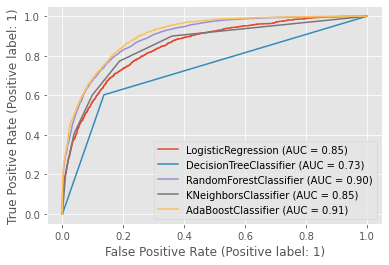

In [83]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DT, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RF, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ADA, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

# HyperParameterTuning

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [94]:
grid_params = {
                'criterion':['gini'],
                'max_depth': [5,15],
                'n_estimators':[5],
                'min_samples_leaf': [2]
                }

In [97]:
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 15],
                         'min_samples_leaf': [2], 'n_estimators': [5]})

In [98]:
GCV.best_params_ 

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'n_estimators': 5}

In [101]:
from sklearn.metrics import roc_auc_score

In [102]:
model = RandomForestClassifier( criterion = 'gini', max_depth=22, n_estimators=900, min_samples_leaf = 1)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred_RF)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")

Accuracy Score: 86.24264141284873%
---------------------------------------------------
roc_auc_score: 77.10978006565138%
---------------------------------------------------
Confusion Matrix : 
 [[5637  389]
 [ 686 1102]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6026
           1       0.74      0.62      0.67      1788

    accuracy                           0.86      7814
   macro avg       0.82      0.78      0.79      7814
weighted avg       0.86      0.86      0.86      7814

---------------------------------------------------


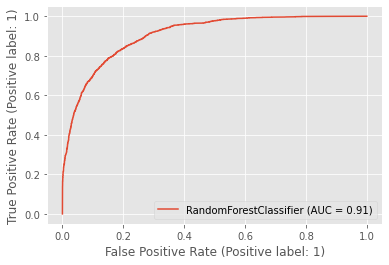

In [103]:
plot_roc_curve(model, x_test, y_test)
plt.show()

# concluding

In [105]:
print("Logistic Regression Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(LR_pred, y_test)))
print("Random Forest Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_RF, y_test)))
print("K-Nearest Neighbors Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_knn, y_test)))
print("DecisionTreeClassifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_DT, y_test)))
print("AdaBoostClassifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_ADA, y_test)))

Logistic Regression Classifier: 83.17% Accuracy
Random Forest Classifier: 85.56% Accuracy
K-Nearest Neighbors Classifier: 83.31% Accuracy
DecisionTreeClassifier: 80.38% Accuracy
AdaBoostClassifier: 85.86% Accuracy


# SavingModel

In [106]:
import joblib
joblib.dump(model,"Census_Income.pkl")

['Census_Income.pkl']